In [1]:
import numpy
import scipy
import matplotlib.pyplot as plt

In [2]:
# numpy.info()

In [3]:
### FRAME CHARACTERISTICS
### ALL VALUES ARE IN mm. If it has a * 10 in the variable, it is because they come stock as cm. 
bottomBracketX = 0             #Starting point - always treat BB as 0,0
bottomBracketY = 0             #Starting point - always treat BB as 0,0
bbDrop = 7.6 * 10              #From checkpoint 56cm                          #From FX S 5 18" = 6.5
headAngle = 71                 #From FX S 5 18"                               #From checkpoint 56cm = 72.2
chainStayLength = 43.8 * 10    #From FX S 5 18"                               #From checkpoint 56cm = 42.5
seatTubeLength = 56 * 10       #From checkpoint 56cm                          #From FX S 5 18" = 45.7
rimDiameter = 622/2            #700c wheel
tireDepth = 42                 #I crudely beleive this works? Essentially saying that the tires will add 42mm to the radius of the wheel. 
rake =50                       
#Rake is from FX fork specs @:
#https://www.jejamescycles.com/trek-fx-carbon-blade-50mm-rake-road-fork-neutral-black-rvv1278.html
forkLengthAxelToCrown = 405    
#Axel to crown is from FX fork specs @:
#https://www.jejamescycles.com/trek-fx-carbon-blade-50mm-rake-road-fork-neutral-black-rvv1278.html
crownDepth = 15                #I made this up. This can be set to zero. 

handleX = 465 
handleY = 658
saddleX = -246
saddleY = 692
stemLength = 100
stemAngle = 6

spacers = 40
headsetHeight = 15


In [4]:
# Convert stem angle to XY coordinates
stemAngleXY = 180- (headAngle+90-stemAngle) 
#Calculate X/Y positions of start of stem, based on stem length
#and stem angle and sign (+/-)
stemLengthY = numpy.sin(numpy.radians(stemAngleXY)) * stemLength
stemLengthX = numpy.cos(numpy.radians(stemAngleXY)) * stemLength
stemStartX = handleX - stemLengthX
stemStartY = handleY - stemLengthY

#Calculate length of "headset/spacers" based on head angle
spacersY = numpy.sin(numpy.radians(headAngle)) * (spacers + headsetHeight)
spacersX = numpy.cos(numpy.radians(headAngle)) * (spacers + headsetHeight)
#Find middle of crown of headtube:
topHeadTubeY = stemStartY - spacersY
topHeadTubeX = stemStartX + spacersX

###### NEED TO CALCULATE CHAINSTAY STUFF TO KNOWN HEIGHT OF WHEELS TO CALCULATE HEAD TUBE SIZE BASED ON FORCE SIZE
#chainstay location/calculations
skewerHeight = bottomBracketY + bbDrop
chainstayY = skewerHeight
chainStayLength = chainStayLength
chainstayX = -numpy.sqrt(((chainStayLength**2)-(chainstayY**2)))

#fork use y=mx+b
slopeForkLine = -numpy.tan(numpy.radians(headAngle)) #rise/run
interceptForkLine = topHeadTubeY - (slopeForkLine*topHeadTubeX) #b = y-mx
#Bottom of fork Y = chainstayY - use y=mx+b to calculate fork x based on the known Y
#x = (y-b)/m
rakeHypoteneus = rake/numpy.sin(numpy.radians(headAngle))
bottomForkY = chainstayY
intersectionHeadTubeLine_and_skewers_X = (bottomForkY-interceptForkLine)/slopeForkLine
bottomForkX = intersectionHeadTubeLine_and_skewers_X + rakeHypoteneus
# y = mx + b 
# bottom

#find bottom of head tube - from the wheel attachment, assuming we know the fork length & rake
#calculate the fork length along the axis of the headtube. We can do this, knowing that the fork 
#is a certain length -this length is the hypoteneus of the fork- Then, we can consider the rake 
#to be the X component of the fork, and now we want to calculate the Y component of the fork. 
#We can simple use pythagorean theorem to do this. 
forkLengthHeadTubeAxis = numpy.sqrt(forkLengthAxelToCrown**2 - rake**2) - numpy.cos(numpy.radians(headAngle)) * rakeHypoteneus
bottomCrownX = intersectionHeadTubeLine_and_skewers_X - (numpy.cos(numpy.radians(headAngle))*forkLengthHeadTubeAxis)
bottomCrownY = bottomForkY + (numpy.sin(numpy.radians(headAngle))*forkLengthHeadTubeAxis)
bottomHeadTubeX = bottomCrownX - (numpy.cos(numpy.radians(headAngle))*crownDepth)
bottomHeadTubeY = bottomCrownY + (numpy.sin(numpy.radians(headAngle))*crownDepth)

# lengthHeadTubeX = numpy.cos(numpy.radians(headAngle)) * headTubeLength
# lengthHeadTubeY = numpy.sin(numpy.radians(headAngle)) * headTubeLength
# bottomHeadTubeX = topHeadTubeX + lengthHeadTubeX
# bottomHeadTubeY = topHeadTubeY - lengthHeadTubeY

#find seat tube angle
seatHeight = numpy.sqrt(saddleX**2 + saddleY**2)
seatTubeAngle = numpy.rad2deg(numpy.arcsin(saddleY/seatHeight))
#find location top of seat tube
topSeatTubeY = numpy.sin(numpy.radians(seatTubeAngle)) * seatTubeLength
topSeatTubeX = -numpy.cos(numpy.radians(seatTubeAngle)) * seatTubeLength


#wheels 
xWheel = numpy.linspace(-rimDiameter, rimDiameter, 1000)
yWheel = numpy.sqrt(rimDiameter**2 - xWheel**2)
xWheel = numpy.concatenate([xWheel, xWheel[::-1]])
yWheel = numpy.concatenate([yWheel,-yWheel])

#tires
xTire = numpy.linspace(-(rimDiameter+tireDepth), (rimDiameter+tireDepth), 1000)
yTire = numpy.sqrt((rimDiameter+tireDepth)**2 - xTire**2)
xTire = numpy.concatenate([xTire, xTire[::-1]])
yTire = numpy.concatenate([yTire,-yTire])

#Calculate Head Tube Length: 
lengthHeadtube = numpy.sqrt((topHeadTubeX-bottomHeadTubeX)**2 + (topHeadTubeY-bottomHeadTubeY)**2)
#Calculate downtube length: 
lengthDowntube = numpy.sqrt(bottomHeadTubeX**2 + bottomHeadTubeY**2)
#Calculate length fork - just to double check: 
lengthFork_check = numpy.sqrt((bottomCrownX-bottomForkX)**2 + (bottomCrownY-bottomForkY)**2)
#calculated length seat tube - double check: 
lengthSeatTube_check = numpy.sqrt(topSeatTubeX**2+topSeatTubeY**2)
#calcualted length seatpost visible: 
lengthSeatPost_check = numpy.sqrt((saddleX-topSeatTubeX)**2 + (saddleY-topSeatTubeY)**2)
#original seat heat from saddle x/y
seatHeight = numpy.sqrt(saddleX**2 + saddleY**2)



### Equation of a circle used to figure out wheel/tire circles
\begin{equation}
x^2 + y^2 = r^2
\end{equation}
\begin{equation}
y^2 = r^2 - x^2
\end{equation}
\begin{equation}
y = \sqrt{r^2 - x^2}
\end{equation}

In [5]:
#Create vectors for each of the seperate parts of the bicycle. 
#this way, we can ploy each of the parts, and they should make up a "bicycle"
chainStayVector = numpy.asarray([[bottomBracketX, bottomBracketY], [chainstayX, chainstayY]])
seatTubeVector = numpy.asarray([[bottomBracketX, bottomBracketY],[topSeatTubeX, topSeatTubeY]]) 
seatPostVector = numpy.asarray([[topSeatTubeX, topSeatTubeY], [saddleX, saddleY]])
headTubeVector = numpy.asarray([[topHeadTubeX, topHeadTubeY], [bottomHeadTubeX, bottomHeadTubeY]])
spacersVector = numpy.asarray([[topHeadTubeX, topHeadTubeY], [stemStartX, stemStartY]])
stemVector = numpy.asarray([[stemStartX, stemStartY], [handleX, handleY]])
downTubeVector = numpy.asarray([[bottomBracketX, bottomBracketY], [bottomHeadTubeX, bottomHeadTubeY]])
crownVector = numpy.asarray([[bottomHeadTubeX, bottomHeadTubeY],[bottomCrownX,bottomCrownY]])
forkVector = numpy.asarray([[bottomCrownX,bottomCrownY], [bottomForkX, bottomForkY]])
rearWheelVector = numpy.asarray([xWheel+chainstayX, yWheel+chainstayY])
rearTireVector = numpy.asarray([xTire+chainstayX, yTire+chainstayY])
frontWheelVector = numpy.asarray([xWheel+bottomForkX, yWheel+bottomForkY])
frontTireVector = numpy.asarray([xTire+bottomForkX, yTire+bottomForkY])


In [6]:
print('The Seat Tube Angle is:                 ' + str(seatTubeAngle)[:5] + ' degrees')
print('The Head Tube Length is:                ' + str(lengthHeadtube)[:5] + ' mm')
print('The Down Tube Length is:                ' + str(lengthDowntube)[:5] + ' mm')
print('The original Fork Length was:           ' + str(forkLengthAxelToCrown)[:5] + ' mm')
print('The calculated fork length is:          ' + str(lengthFork_check)[:5] + ' mm')
print('The calculated seat tube length is:     ' + str(lengthSeatTube_check)[:5] +' mm')
print('The calcualted seat post length is:     ' + str(lengthSeatPost_check)[:5]+' mm')
print('The calcualted total seat height is:    ' + str(lengthSeatTube_check + lengthSeatPost_check)[:5] + ' mm')
print('The original total seat height was:     ' + str(seatHeight)[:5] + ' mm')


The Seat Tube Angle is:                 70.43 degrees
The Head Tube Length is:                116.1 mm
The Down Tube Length is:                625.3 mm
The original Fork Length was:           405 mm
The calculated fork length is:          405.0 mm
The calculated seat tube length is:     560.0 mm
The calcualted seat post length is:     174.4 mm
The calcualted total seat height is:    734.4 mm
The original total seat height was:     734.4 mm


/Users/gattia/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


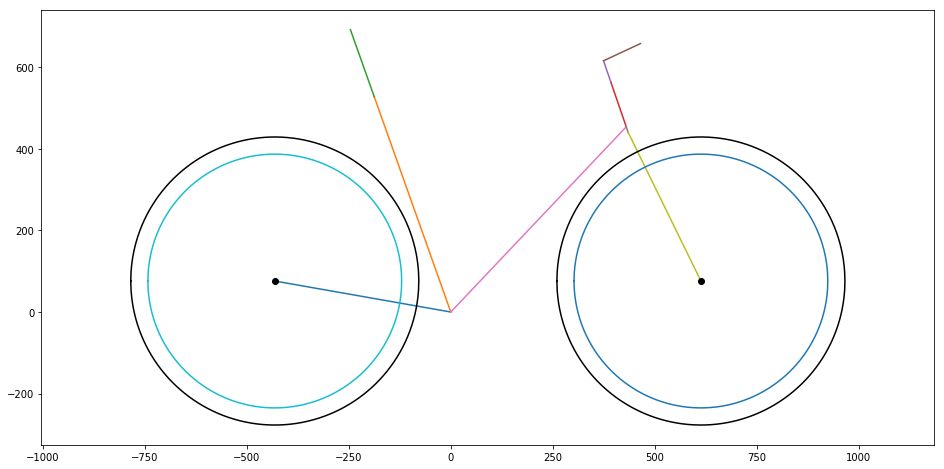

In [7]:
plt.figure(figsize=(16,8))
plt.plot(chainStayVector[:,0], chainStayVector[:,1])
plt.plot(chainStayVector[1,0], chainStayVector[1,1], 'ko' )
plt.plot(seatTubeVector[:,0], seatTubeVector[:,1])
plt.plot(seatPostVector[:,0], seatPostVector[:,1])
plt.plot(headTubeVector[:,0], headTubeVector[:,1])
plt.plot(spacersVector[:,0], spacersVector[:,1])
plt.plot(stemVector[:,0], stemVector[:,1])
plt.plot(downTubeVector[:,0], downTubeVector[:,1])
plt.plot(crownVector[:,0], crownVector[:,1])
plt.plot(forkVector[:,0], forkVector[:,1])
plt.plot(forkVector[1,0], forkVector[1,1], 'ko')
plt.plot(rearWheelVector[0,:], rearWheelVector[1,:])
plt.plot(rearTireVector[0,:], rearTireVector[1,:], c='k')
plt.plot(frontWheelVector[0,:], frontWheelVector[1,:])
plt.plot(frontTireVector[0,:], frontTireVector[1,:], c='k')
plt.axes().set_aspect('equal', 'datalim')